# Sentiment Analysis on Hotel Reviews

## Table of Contents

1. [Introduction](#Introduction)
2. [Description of Data](#DescriptionofData)
3. [Summary of Visualization](#3.-Summary-of-Visualization)
4. [NLP Techniques to Analyse Data](#4.-NLP-Techniques-to-Analyse-Data)
5. [Conclusion](#5.-Conclusion)

## 1. Introduction <a class="anchor" id="Introduction"></a>

Today, businesses use natural language processing, statistical analysis, and text analysis to identify the sentiment and classify words into positive, negative, and neutral categories.

The best companies understand the importance of understanding their customers’ sentiments – what they are saying, what they mean and how they are saying. You can use sentiment analysis to identify customer sentiment in comments, reviews, tweets, or social media platforms where people mention your brand. As customers express their reviews and thoughts about the brand more openly than ever before, sentiment analysis has become a powerful tool to monitor and understand online conversations. Analyzing customer feedback and reviews automatically through survey responses or social media discussions allows you to learn what makes your customer happy or disappointed.

In this case study, sentiment analysis has been taken on hotel reviews data to analyse the process of detecting positive or negative sentiment in customers' reviews. It helps us to guide how customers' react to our services.

In [74]:
#Import libraries
import pandas as pd
from matplotlib import pyplot as plt

import nltk
from nltk import word_tokenize
from nltk.probability import FreqDist
import urllib.request
from wordcloud import WordCloud
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

from transformers import pipeline
import torch
from codecarbon import EmissionsTracker
from transformers import pipeline, AutoTokenizer,AutoModel,AutoModelForSequenceClassification

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Thimira\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Thimira\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 2. Description of Data <a class="anchor" id="DescriptionofData"></a>

This dataset is a list of about 1,400 hotels and 10,000 reviews from Datafiniti's Business Database updated between December 2018 and May 2019. The dataset includes hotel location, name, rating, review data, title, username, and more.
(Link - [Hotel Reviews Dataset](https://www.kaggle.com/datasets/datafiniti/hotel-reviews/data?select=Datafiniti_Hotel_Reviews_Jun19.csv))

In [2]:
#load data
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",5)
df = pd.read_csv("Hotel_Reviews.csv")
df

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sourceURLs,websites
0,AWE2FvX5RxPSIh2RscTK,2018-01-18T18:43:12Z,2019-05-20T23:55:47Z,5620 Calle Real,"Hotels,Hotels and motels,Hotel and motel mgmt....",Accommodation & Food Services,Goleta,US,us/ca/goleta/5620callereal/-1127060008,34.441780,-119.819790,Best Western Plus South Coast Inn,93117,CA,2018-01-01T00:00:00.000Z,NaN,2018-01-03T00:00:00Z,3,https://www.tripadvisor.com/Hotel_Review-g3243...,"This hotel was nice and quiet. Did not know, t...",Best Western Plus Hotel,San Jose,UnitedStates,tatsurok2018,https://www.tripadvisor.com/Hotel_Review-g3243...,https://www.bestwestern.com/en_US/book/hotel-r...
1,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.557220,-121.921940,Best Western Carmel's Town House Lodge,93921,CA,2016-04-02T00:00:00Z,NaN,2016-10-09T00:00:00Z,4,https://www.tripadvisor.com/Hotel_Review-g3217...,We stayed in the king suite with the separatio...,Clean rooms at solid rates in the heart of Carmel,San Francisco,CA,STEPHEN N,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9998,AV1thTgM3-Khe5l_OvT5,2017-07-23T03:37:13Z,2018-12-02T00:27:00Z,7886 Main Street,"Hotels,Bar,Hotel,Restaurants",Accommodation & Food Services,Hunter,US,us/ny/hunter/7886mainstreet/-435384771,42.210915,-74.215309,Roseberry's Inn,12442,NY,2016-10-26T00:00:00.000Z,NaN,"2018-01-03T00:00:00Z,2017-12-17T00:00:00Z,2017...",5,https://www.tripadvisor.com/Hotel_Review-g4793...,Awesome wings (my favorite was garlic parmesan...,Great Atmosphere!,Hunter,NewYork,soccerrocks2016,https://www.bbb.org/us/ny/hunter/profile/hotel...,http://www.roseberrysinnhunter.com/
9999,AV1tg9C7a4HuVbed8XA5,2017-07-23T03:35:41Z,2018-12-01T21:24:24Z,3505 S Main St,"Hotels,Hotels and motels,Corporate Lodging,Lod...",Accommodation & Food Services,Lindale,US,us/tx/lindale/3505smainst/-147603681,32.469540,-95.390420,Hampton Inn-lindale/tyler,75771,TX,2017-06-29T00:00:00.000Z,NaN,2017-07-14T00:00:00Z,4,http://tripadvisor.com/Hotel_Review-g56167-d22...,Clean facility just off freeway ..... staff fr...,Health care appointments,Fort Worth,Texas,tootallsmith,https://www.yellowpages.com/lindale-tx/mip/ham...,http://hamptoninn3.hilton.com/en/hotels/texas/...


In [3]:
#display all the columns
df.columns

Index(['id', 'dateAdded', 'dateUpdated', 'address', 'categories',
       'primaryCategories', 'city', 'country', 'keys', 'latitude', 'longitude',
       'name', 'postalCode', 'province', 'reviews.date', 'reviews.dateAdded',
       'reviews.dateSeen', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username', 'sourceURLs', 'websites'],
      dtype='object')

Selecting required columns to conduct the analysis

In [5]:
review = df.loc[:,['id','address','city','country','name','reviews.rating','reviews.text']]
review.head(5)

,id,address,city,country,name,reviews.rating,reviews.text
0,AWE2FvX5RxPSIh2RscTK,5620 Calle Real,Goleta,US,Best Western Plus South Coast Inn,3,"This hotel was nice and quiet. Did not know, t..."
1,AVwcj_OhkufWRAb5wi9T,5th And San Carlos PO Box 3574,Carmel by the Sea,US,Best Western Carmel's Town House Lodge,4,We stayed in the king suite with the separatio...
2,AVwcj_OhkufWRAb5wi9T,5th And San Carlos PO Box 3574,Carmel by the Sea,US,Best Western Carmel's Town House Lodge,3,"Parking was horrible, somebody ran into my ren..."
3,AVwcj_OhkufWRAb5wi9T,5th And San Carlos PO Box 3574,Carmel by the Sea,US,Best Western Carmel's Town House Lodge,5,Not cheap but excellent location. Price is som...
4,AVwcj_OhkufWRAb5wi9T,5th And San Carlos PO Box 3574,Carmel by the Sea,US,Best Western Carmel's Town House Lodge,2,If you get the room that they advertised on th...


In [6]:
#data types
pd.set_option("display.max_rows",7)
review.dtypes

id                object
address           object
city              object
country           object
name              object
reviews.rating     int64
reviews.text      object
dtype: object

In [7]:
#shape of the data
review.shape

(10000, 7)

Remove white spaces in the dataframe

In [9]:
def whitespace_remover(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].map(str.strip)
        else:
            pass

whitespace_remover(review)

Total summation of missing values in dataframe

In [11]:
review.isnull().sum().sum()

0

In [12]:
#Count unique values in Id column. So it gives us total number of hotels that are reviewd by customers.
review['id'].nunique()

1433

So, this dataset contains 1433 hotels and its reviews. For this analysis, I select only hotels which has more than 100 reviews. Then it will give us proper understand about customers' feedback on each hotel and also it will help me to conduct well-balanced analysis. 

In [13]:
#group all the hotels to filter out hotels which has more than 100 reviews
grouped=review.groupby('id')
grouped.size().sort_values(ascending=False)

id
AVwcgshl_7pvs4fzv3ge    209
AVweB_oFByjofQCxuqx2    183
AWE7bZc53-Khe5l_f3pJ    144
                       ... 
AVwdy1pFByjofQCxskWi      1
AVwctTwDByjofQCxhTd1      1
AVwdXghdByjofQCxoX1v      1
Length: 1433, dtype: int64

In [14]:
df_filter=review.groupby(['id'])['name'].size().sort_values(ascending=False).reset_index()
df_filter=df_filter[df_filter.name>100]
df_filter.head(5)

,id,name
0,AVwcgshl_7pvs4fzv3ge,209
1,AVweB_oFByjofQCxuqx2,183
2,AWE7bZc53-Khe5l_f3pJ,144
3,AVwdmGkmIN2L1WUfxXj-,136
4,AWM8kLxMRxPSIh2Ruhz4,135


In [15]:
df_filter.shape

(15, 2)

After filtering the dataset( hotels which has more than 100 reviews ), we can see there are 15 hotels in the result dataset(df_filter). Next, we gonna filter main dataset (review) based on this results.

In [16]:
selected_hotels=list(df_filter['id'])
mask = review['id'].isin(selected_hotels)
df_selected = review[mask]
df_selected=df_selected.reset_index(drop=True)
df_selected.head(6)

,id,address,city,country,name,reviews.rating,reviews.text
0,AVwdDi4c_7pvs4fz1yly,411 Hotel Cir S,San Diego,US,Best Western Seven Seas,2,I guess they don't care about the little critt...
1,AVwdDi4c_7pvs4fz1yly,411 Hotel Cir S,San Diego,US,Best Western Seven Seas,5,I enjoyed my stay here. This hotel is exactly ...
2,AVwdDi4c_7pvs4fz1yly,411 Hotel Cir S,San Diego,US,Best Western Seven Seas,1,"The hotel is nice, the location is good, and t..."
3,AVwdDi4c_7pvs4fz1yly,411 Hotel Cir S,San Diego,US,Best Western Seven Seas,5,Awesome hotel in the circle perfect located 10...
4,AVwdDi4c_7pvs4fz1yly,411 Hotel Cir S,San Diego,US,Best Western Seven Seas,1,The hotel is located next to a very noisy high...
5,AVwdDi4c_7pvs4fz1yly,411 Hotel Cir S,San Diego,US,Best Western Seven Seas,2,the restaurant was overpriced and not very goo...


In [17]:
df_selected.shape

(1992, 7)

samdnsajndiahiaijnaijd


## 3. Summary of Visualization

In [18]:
#create a datafram for plotting purposes
plt_table = df_selected.groupby('name').size().reset_index()
plt_table = plt_table.rename(columns={0:'total_reviews_count'})
plt_table.head(5)

,name,total_reviews_count
0,Best Western Seven Seas,132
1,Drury Inn & Suites New Orleans,132
2,Fairfield Inn Philadelphia Airport,101
3,French Market Inn,144
4,Galleria Park Hotel,125


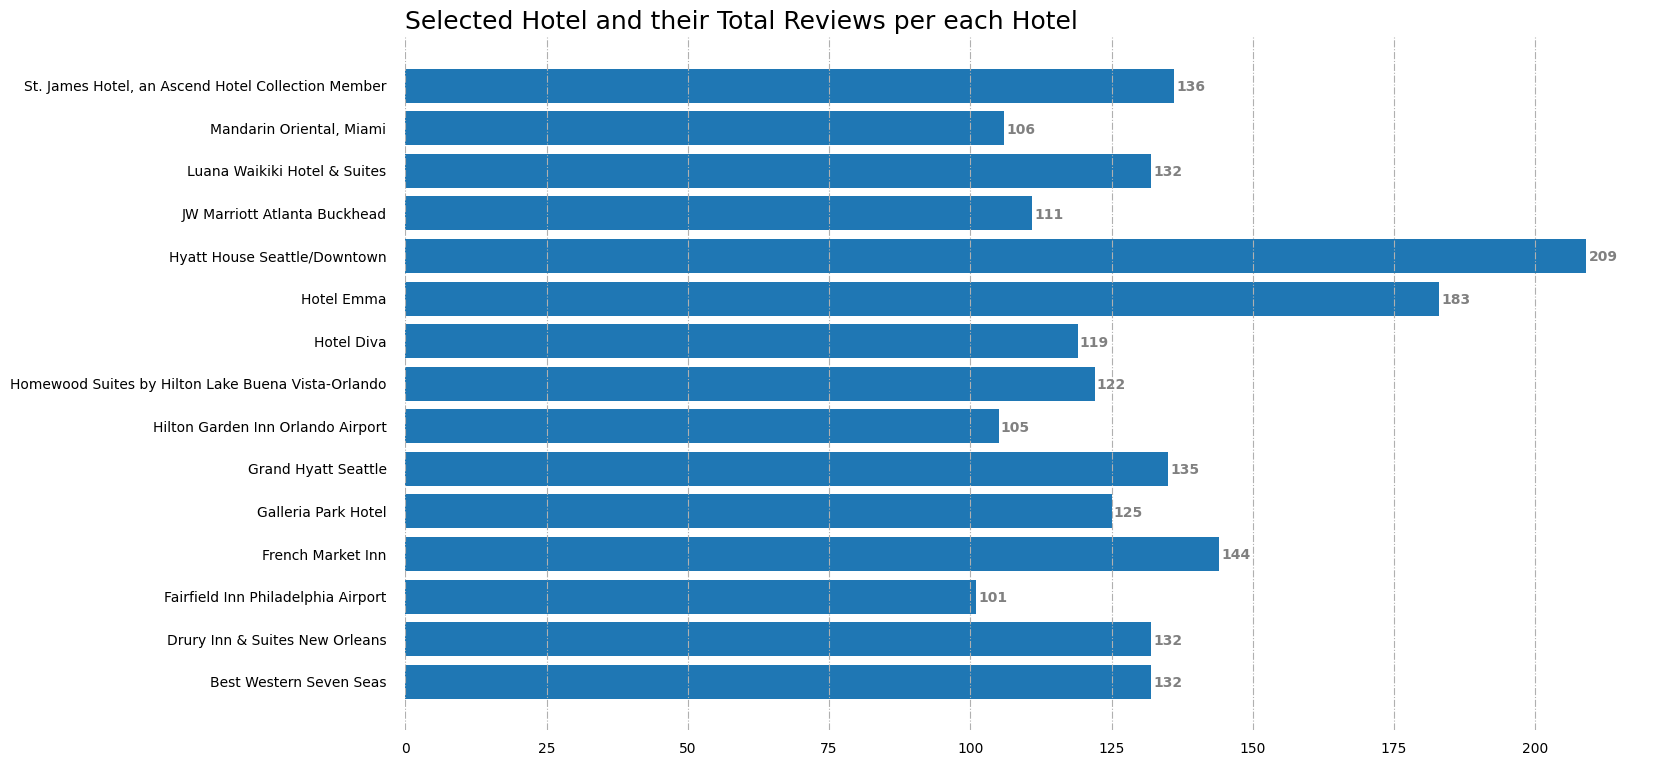

In [19]:
hotel = plt_table['name']
number_of_reviews = plt_table['total_reviews_count']

# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))

# Horizontal Bar Plot
ax.barh(hotel, number_of_reviews)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(axis='x',linestyle ='-.')

for i in ax.patches:
    plt.text(i.get_width()+0.4,
             i.get_y()+0.275,
             i.get_width(),
             fontsize = 10, 
             fontweight ='bold',
             color ='grey')
             
# Add Plot Title
ax.set_title('Selected Hotel and their Total Reviews per each Hotel',fontsize = 18, loc ='left', )
# Show Plot
plt.show()

#### WordCloud for low ratings and high ratings

WordCloud has been undertaken to understand most frequent words used in the reviews. So according to hotel ratings, it has been divided into two groups which are high ratings hotels and low rating hotels. Hotels above 3 stars are considered as high ratings hotels, Hotels which has 3 stars and below 3 stars are considered as low ratings hotels.

In [41]:
#stopwords list
stopwords_list = stopwords.words('english')

Defining function to create a list which has clean words in lower case without any punctuations and stopwords.

In [38]:
def clean_text(text):
    #convert text to lowercase and join them into single string
    rating_reviews = text.str.lower()
    rating_reviews = rating_reviews.str.cat(sep=' ')

    #tokenize the words in the text
    review_words = word_tokenize(rating_reviews)

    #Removing punctuation 
    review_no_punc = []

    for word in review_words:
        if word.isalpha():
            review_no_punc.append(word)

    #list with clean reviews words
    clean_reviews = []

    for word in review_no_punc:
        if word not in stopwords_list:
            clean_reviews.append(word)

    return clean_reviews

#### High ratings Hotels WordCloud

In [42]:
#high rating hotel dataset
df_high_rating = df_selected[df_selected['reviews.rating']>3]

In [43]:
print('Structure of the df_high_rating dataset :',df_high_rating.shape,'\n')
df_high_rating.head(5)

Structure of the df_high_rating dataset : (1674, 7) 



,id,address,city,country,name,reviews.rating,reviews.text
1,AVwdDi4c_7pvs4fz1yly,411 Hotel Cir S,San Diego,US,Best Western Seven Seas,5,I enjoyed my stay here. This hotel is exactly ...
3,AVwdDi4c_7pvs4fz1yly,411 Hotel Cir S,San Diego,US,Best Western Seven Seas,5,Awesome hotel in the circle perfect located 10...
7,AVwdDi4c_7pvs4fz1yly,411 Hotel Cir S,San Diego,US,Best Western Seven Seas,4,We stayed overnight in San Diego on our roadtr...
8,AVwdDi4c_7pvs4fz1yly,411 Hotel Cir S,San Diego,US,Best Western Seven Seas,4,I took my almost 13 year old niece to San Dieg...
9,AVwdDi4c_7pvs4fz1yly,411 Hotel Cir S,San Diego,US,Best Western Seven Seas,4,"Due to LOSSAN performing track maintenance, I ..."


In [44]:
#Extract the reviews.text column
high_rating_reviews = df_high_rating['reviews.text']
high_reviews_clean_words = clean_text(high_rating_reviews)

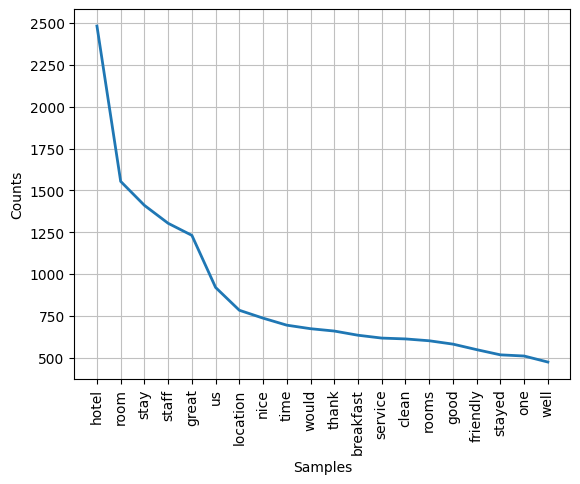

In [45]:
#find the 10 most common words
fdist_high = FreqDist(high_reviews_clean_words)
fdist_high.plot(20)
plt.show()

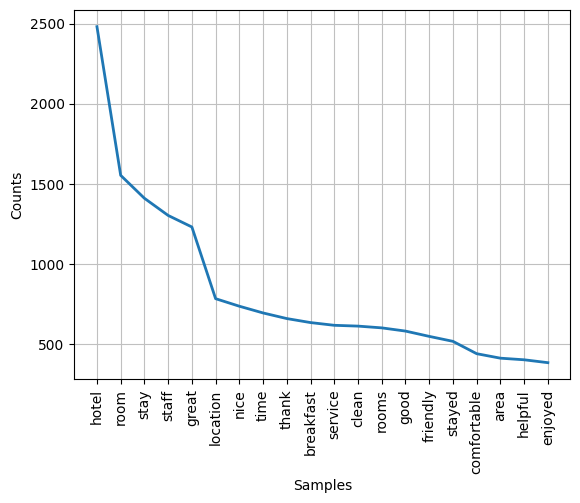

In [58]:
#update stopwords list 
stopwords_list.extend(['us','would','one','get','like','back','next','also','well','could'])

custome_clean_high_review =[]
for word in high_reviews_clean_words:
    if word not in stopwords_list:
        custome_clean_high_review.append(word)

custome_fdist_high = FreqDist(custome_clean_high_review)
custome_fdist_high.plot(20)
plt.show()

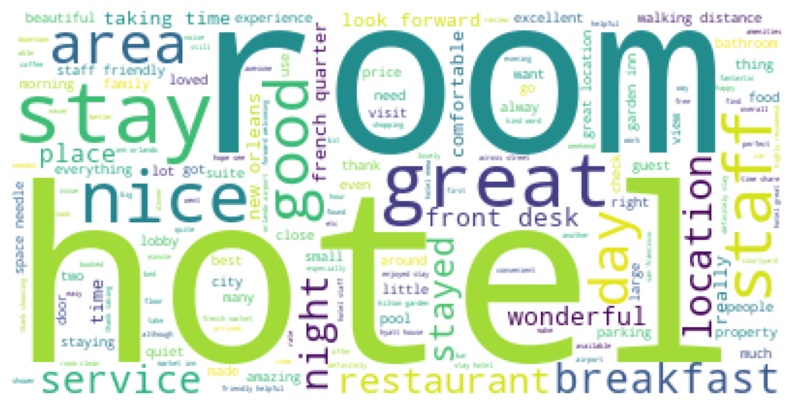

In [59]:
#convert custome_clean_high_review to single string

high_review_string = " ".join(custome_clean_high_review)

high_review_wordcloud = WordCloud(background_color = 'white').generate(high_review_string)

plt.figure(figsize = (10,7))
plt.imshow(high_review_wordcloud)

plt.axis('off')
plt.show()

#### Low ratings Hotels WordCloud

In [60]:
#high rating hotel dataset
df_low_rating = df_selected[df_selected['reviews.rating']<=3]
print('Structure of the df_low_rating dataset :',df_low_rating.shape,'\n')
df_low_rating.head(5)

Structure of the df_low_rating dataset : (318, 7) 



,id,address,city,country,name,reviews.rating,reviews.text
0,AVwdDi4c_7pvs4fz1yly,411 Hotel Cir S,San Diego,US,Best Western Seven Seas,2,I guess they don't care about the little critt...
2,AVwdDi4c_7pvs4fz1yly,411 Hotel Cir S,San Diego,US,Best Western Seven Seas,1,"The hotel is nice, the location is good, and t..."
4,AVwdDi4c_7pvs4fz1yly,411 Hotel Cir S,San Diego,US,Best Western Seven Seas,1,The hotel is located next to a very noisy high...
5,AVwdDi4c_7pvs4fz1yly,411 Hotel Cir S,San Diego,US,Best Western Seven Seas,2,the restaurant was overpriced and not very goo...
6,AVwdDi4c_7pvs4fz1yly,411 Hotel Cir S,San Diego,US,Best Western Seven Seas,2,We arrived at this hotel a little early for ch...


In [61]:
#Extract the reviews.text column
low_rating_reviews = df_low_rating['reviews.text']
low_reviews_clean_words = clean_text(low_rating_reviews)

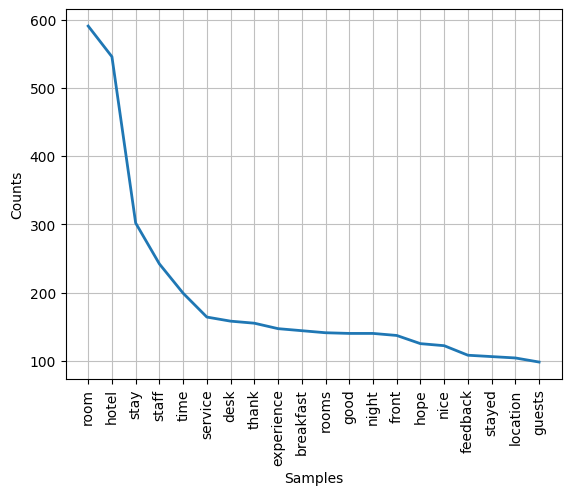

In [62]:
#find the 10 most common words in low ratings word list
fdist_low = FreqDist(low_reviews_clean_words)
fdist_low.plot(20)
plt.show()

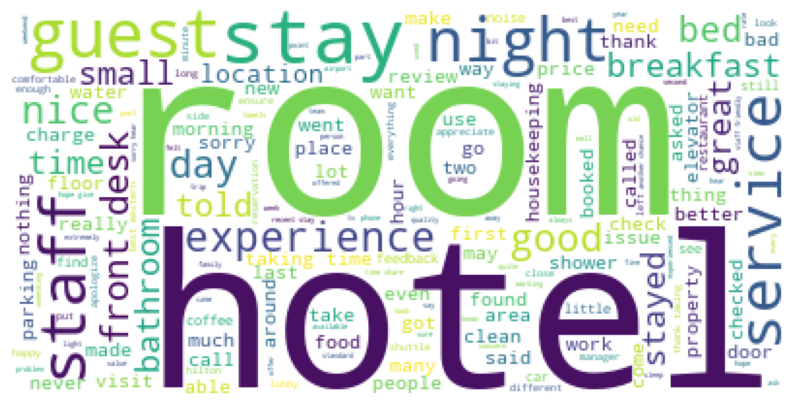

In [63]:
#convert clean_low_review to single string

low_review_string = " ".join(low_reviews_clean_words)

low_review_wordcloud = WordCloud(background_color = 'white').generate(low_review_string)

plt.figure(figsize = (10,7))
plt.imshow(low_review_wordcloud)

plt.axis('off')
plt.show()

In conclusion, low rating hotels and high rating hotels both have common words which are hotel and room. So basically which means, high rating hotels have quality and well mannered hotel rooms and others not. Moreover, high rating hotel rooms' wordcloud is full with words like staff, great,location,friendly,area,service and more. In contrast, low rating hotels share same words but we know those have opposite meanings. From this conclusion we can get a clear idea about what lack in low rating hotel rooms and where we have to focus onto make changes. 

## 4. NLP Techniques to Analyse Data

Pre-trained HuggingFace Transformers will be used to analyse the review text data to get more depth understand of customers' feedback. In this case study, roBERTa-base model has been undertaken. 

In [100]:
raw_inputs = list(df_selected['reviews.text'])
#raw_inputs[0:5]
len(raw_inputs)

1992

#### Performing sentiment analysis using piplines

In [103]:
model_name = "cardiffnlp/twitter-xlm-roberta-base-sentiment"

device = 0 if torch.cuda.is_available() else -1

model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)
classifier = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer,batch_size = 8,device=device,padding = 'max_length',max_length=128,truncation=True)
results = classifier(raw_inputs)

In [170]:
#results from the pre-trained model to dataframe.
df_results = pd.DataFrame(results,columns=['label','score'])
df_results.head(5)

,label,score
0,negative,0.656887
1,positive,0.715487
2,negative,0.619511
3,positive,0.885942
4,negative,0.473327


## 5. Conclusion

Create final dataframe adding results and selected_df together.

In [109]:
final = pd.concat([df_selected,df_results],axis=1)
final.head(5)

,id,address,city,country,name,reviews.rating,reviews.text,label,score
0,AVwdDi4c_7pvs4fz1yly,411 Hotel Cir S,San Diego,US,Best Western Seven Seas,2,I guess they don't care about the little critt...,negative,0.656887
1,AVwdDi4c_7pvs4fz1yly,411 Hotel Cir S,San Diego,US,Best Western Seven Seas,5,I enjoyed my stay here. This hotel is exactly ...,positive,0.715487
2,AVwdDi4c_7pvs4fz1yly,411 Hotel Cir S,San Diego,US,Best Western Seven Seas,1,"The hotel is nice, the location is good, and t...",negative,0.619511
3,AVwdDi4c_7pvs4fz1yly,411 Hotel Cir S,San Diego,US,Best Western Seven Seas,5,Awesome hotel in the circle perfect located 10...,positive,0.885942
4,AVwdDi4c_7pvs4fz1yly,411 Hotel Cir S,San Diego,US,Best Western Seven Seas,1,The hotel is located next to a very noisy high...,negative,0.473327


#### Analyzing data with results from NLP model

In [167]:
ratings_compare=final.groupby(['reviews.rating','label']).size().reset_index()
ratings_compare = ratings_compare.rename(columns={0:'total_count'})
ratings_compare.head(5)

,reviews.rating,label,total_count
0,1,negative,45
1,1,neutral,6
2,1,positive,2
3,2,negative,65
4,2,neutral,5


Create stacked bar chart to visualize the 5 stars rating data with results from NLP model.

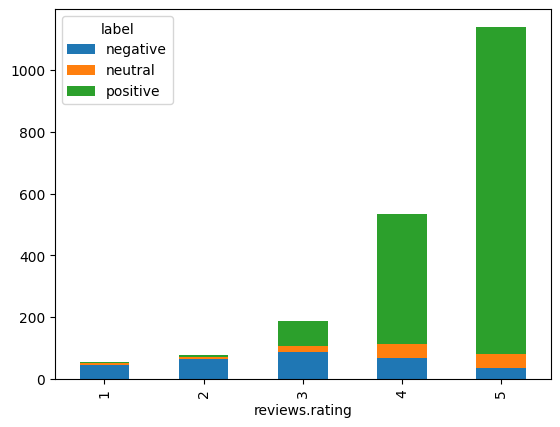

In [169]:
ratings_compare=final.groupby(['reviews.rating','label']).size().unstack().plot(kind='bar', stacked=True)

In this stacked bar chart shows, even if the customer gives 5 stars, when it comes to reviewing about the facility, theres some negativity in their feedback according to our sentiment analysis model. This model directly calculate the feedback from the customer and it gives overall sentimental value of their experience about the hotel or service that they received. 

This sentiment analysis help us to understand how customer feels about the facility or the services they recevied. So considering above graph,we can conclude, when customer gives 5 start doesn't mean we were able to provide excellent service but when we reconsider their thoughts or feelings we could able to find what we actually missing. So, it is important to analyze their thoughts, then,as hotel, it will helps us to provide an excellent service for them.